In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [9]:
n = 100

epsilon = list(np.random.uniform(-40, 40, n - 1))
epsilon.append(n * np.sqrt(63) - np.sum(epsilon))

xi = list(np.random.uniform(-4, 4, n - 1))
xi.append(-n - np.sum(xi))

p_uniform = np.ones(n)/n

L_total = np.sqrt(np.mean(epsilon)**2 + np.mean(xi)**2)
rho = 1/(4 * L_total)

In [10]:
def operator_F(x, data, sample):
    M = []
    for i in sample:
        M.append(np.array([[data[1][i], data[0][i]],[-data[0][i], data[1][i]]]))
    return np.mean(M, axis = 0) @ x

def operator_norm(x):
    M = np.array([[np.mean(xi), np.mean(epsilon)], [-np.mean(epsilon), np.mean(xi)]])
    return np.sum((M @ x)**2)

def SPEG_operator(x_0, x_optimal, step1, step2, batchsize, n, data, operator, prob, iterations = 1000, trials = 10):
    
    relative_sq_operator_norm = []
    initial_error = operator_norm(x_0)
    
    for trial in range(trials):
        sq_operator_norm = []
        
        sample = np.random.choice(n, batchsize, p = prob)
        op = operator(x_0, data, sample)
        x = x_0 - step2 * op
        
        for iteration in range(iterations):
            x_mid = x - step1 * op
            sample = np.random.choice(n, batchsize, p = prob)
            op = operator(x_mid, data, sample)
            x = x - step2 * op
     
            sq_operator_norm.append(operator_norm(x_mid)/initial_error)
        relative_sq_operator_norm.append(sq_operator_norm)
        
    return np.mean(relative_sq_operator_norm, axis = 0)

In [20]:
no_iterations = 50000
x_start = np.random.normal(0, 1, 2)

batchsize_fraction = .1

SPEG_operator_error = SPEG_operator(x_start, np.zeros(2), .0626, .00009, math.ceil(n * batchsize_fraction), n, (epsilon, xi), operator_F, p_uniform, iterations= no_iterations)

Text(0.5, 1.0, 'SPEG on WMVI')

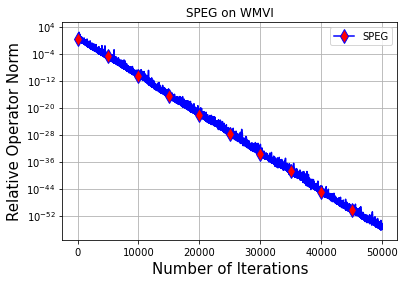

In [6]:
fig = plt.figure()
markers_on = np.arange(0, no_iterations, no_iterations/10).astype(int)
plt.plot(np.arange(no_iterations), SPEG_operator_error, '-bd', mfc = 'red', markevery = markers_on, markersize = 10, label = 'SPEG')

plt.yscale('log')
plt.grid(True)
plt.ylabel("Relative Operator Norm", fontsize = 15)
plt.xlabel("Number of Iterations", fontsize = 15)
plt.legend(fontsize = 10)
plt.title("SPEG on WMVI")

plt.savefig(f'SPEG_on_WMVI_w_rel_op_err_batchsize = {batchsize_fraction}.pdf', bbox_inches='tight')

In [8]:
1/L_total, max(2*rho, 1/(2*L_total))

(0.125, 0.0625)

In [9]:
gamma = .063
min(gamma - 2*rho, 1/(4*L_total) - gamma/4)

0.0005000000000000004

In [10]:
omega = .0005
(1 - L_total * gamma) * omega

0.000248

In [21]:
markers_on

array([    0,  5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000,
       45000])

In [22]:
SPEG_operator_error[markers_on]

array([1.25440090e+00, 3.84219581e-01, 8.63362400e-02, 1.95309266e-02,
       3.99200908e-01, 2.22251572e-02, 4.11012603e-02, 6.08261828e-04,
       1.47906458e-04, 9.94653388e-06])

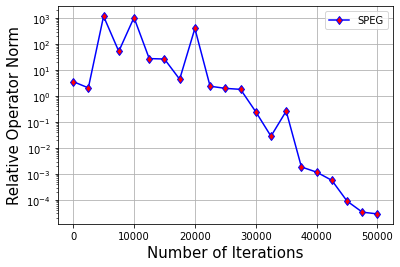

In [22]:
fig = plt.figure()
markers_on = np.arange(0, no_iterations, no_iterations/20).astype(int)

plt.plot(np.append(markers_on, no_iterations-1), SPEG_operator_error[np.append(markers_on, no_iterations-1)], '-bd', mfc = 'red', label = 'SPEG')
plt.yscale('log')
plt.grid(True)
plt.ylabel("Relative Operator Norm", fontsize = 15)
plt.xlabel("Number of Iterations", fontsize = 15)
plt.legend(fontsize = 10)
plt.savefig(f'SPEG_on_WMVI_w_rel_op_err_batchsize = {batchsize_fraction}.pdf', bbox_inches='tight')

In [30]:
np.append(markers_on, no_iterations-1)

array([    0,  5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000,
       45000, 49999])